<a href="https://colab.research.google.com/github/Niger49/CSE3210_DSP/blob/main/Assignment4_2003049.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

**2.1 Signal Generation and Transformations**

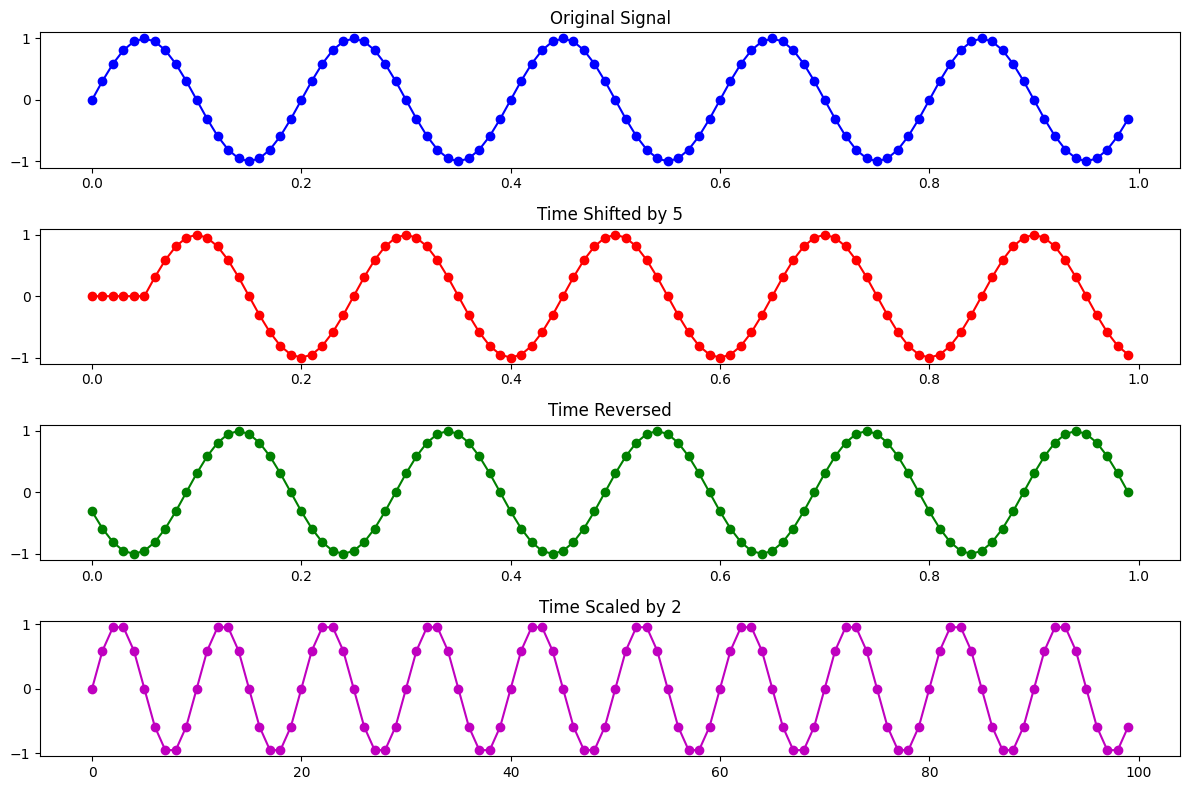

In [ ]:
#signal
# N = 50
# n = np.arange(0, N)
fs = 100
n = np.arange(0, 1, 1/fs)
# T = 1/fs
f = 5

x = np.sin(2*np.pi*f* n)

# #Time Shifting: x[n − k]
k = 5
N = len(x)
x_shift = np.zeros(N)

for i in range(N):
    if i - k >= 0:
        x_shift[i] = x[i - k]

#Time Reversal: x[−n]
x_reversed = x[::-1]

# Time Scaling: x[a · n]
a = 2
x_scaled = np.sin(2 * np.pi * f * a * n)

plt.figure(figsize=(12, 8))
plt.subplot(4,1,1)
plt.plot(n,x, 'b-o')
plt.title('Original Signal')

plt.subplot(4,1,2)
plt.plot(n, x_shift, 'r-o')
plt.title(f'Time Shifted by {k}')

plt.subplot(4,1,3)
plt.plot(n, x_reversed, 'g-o')
plt.title('Time Reversed')

plt.subplot(4,1,4)
plt.plot(x_scaled, 'm-o')
plt.title('Time Scaled by 2')

plt.tight_layout()
plt.show()

# 3 Discrete Fourier Transform (DFT)

100


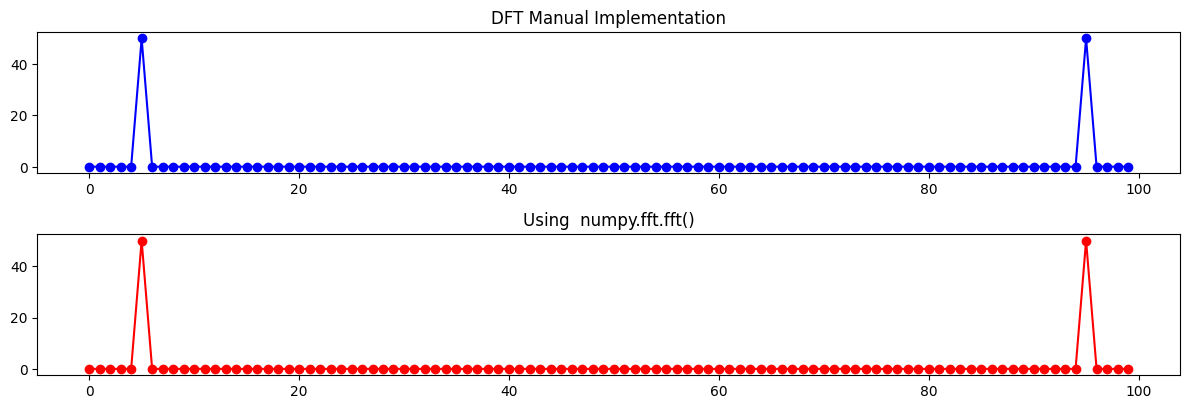

In [ ]:
N = len(x)
print(N)
X = np.zeros(N, dtype=complex)

for k in range(N):
    for n in range(N):
        X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)

# print(X)

x_numpy = np.fft.fft(x)
# print(x_numpy)

plt.figure(figsize=(12, 8))
plt.subplot(4,1,1)
plt.plot(np.abs(X), 'b-o')
plt.title('DFT Manual Implementation')

plt.subplot(4,1,2)
plt.plot(np.abs(x_numpy), 'r-o')
plt.title('Using  numpy.fft.fft()')

plt.tight_layout()
plt.show()

# 4 Discrete-Time Fourier Transform (DTFT)

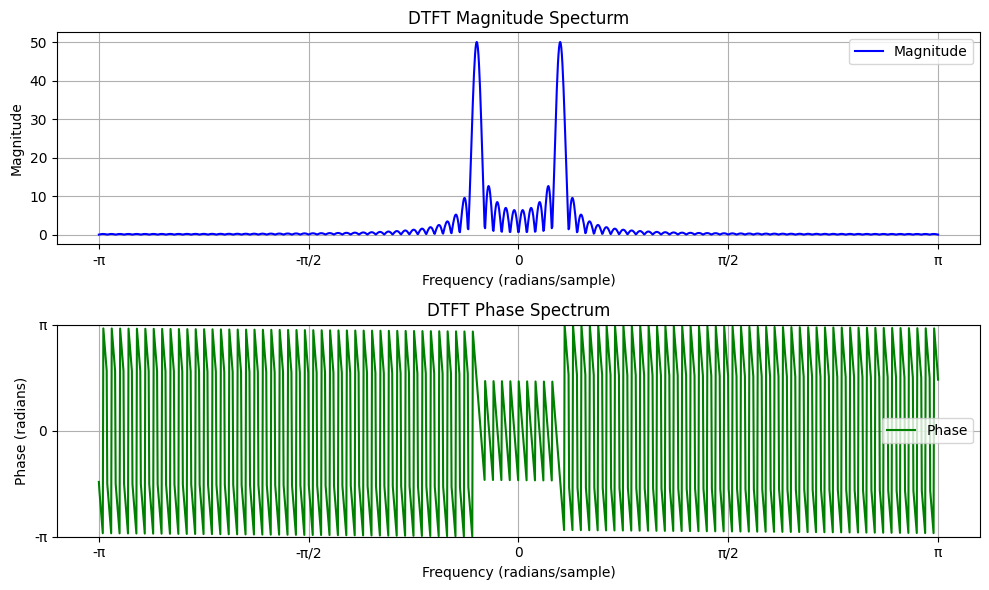

In [ ]:
freq = np.linspace(-np.pi, np.pi, 1500)

X = np.zeros(len(freq), dtype=complex)
for p in range(len(freq)):
    w = freq[p]
    sum = 0.0
    for n_idx in range(len(x)):
        sum += x[n_idx] * np.exp(-1j * w * n_idx)
    X[p] = sum

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(freq, np.abs(X), label='Magnitude', color='blue')
plt.title("DTFT Magnitude Specturm")
plt.xlabel("Frequency (radians/sample)")
plt.ylabel("Magnitude")
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          ['-π', '-π/2', '0', 'π/2', 'π'])
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(freq, np.angle(X), label='Phase', color='green')
plt.title("DTFT Phase Spectrum")
plt.xlabel("Frequency (radians/sample)")
plt.ylabel("Phase (radians)")
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          ['-π', '-π/2', '0', 'π/2', 'π'])
plt.yticks([-np.pi, 0, np.pi], ['-π', '0', 'π'])
plt.ylim(-np.pi, np.pi)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# 5 Fast Fourier Transform (FFT) Efficiency

In [ ]:
# Time for manual DFT
start = time.time()

N = len(x)
# print(N)
X = np.zeros(N, dtype=complex)

for k in range(N):
    for n in range(N):
        X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
manual_time = time.time() - start

# Time for FFT
start = time.time()
np.fft.fft(x)
fft_time = time.time() - start

print(f"Time for Manual DFT={manual_time:.4f}s,\n Time for using FFT={fft_time:.4f}s")


Time for Manual DFT=0.0407s,
 Time for using FFT=0.0004s


# 6 Filtering in the Frequency Domain

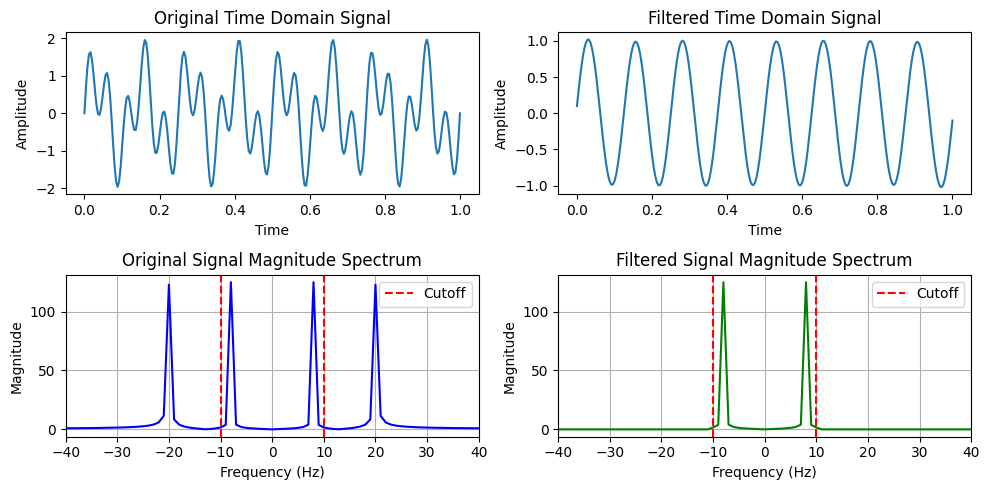

In [ ]:
fs = 250
t = np.linspace(0, 1, fs)

x1 = np.sin(2 * np.pi * 8 * t)
x2 = np.sin(2 * np.pi * 20 * t)
y = x1 + x2

spectrum = np.fft.fft(y)
frequency = np.fft.fftfreq(len(y), 1/fs)

cutoff_fq = 10
f_mask = np.abs(frequency) <= cutoff_fq
filtered_spectrum = spectrum * f_mask

filtered_y = np.fft.ifft(filtered_spectrum).real

# Calculate magnitude spectra
original_magnitude = np.abs(spectrum)
filtered_magnitude = np.abs(filtered_spectrum)

# Shift for centered visualization
shift_freq = np.fft.fftshift(frequency)
shift_original = np.fft.fftshift(original_magnitude)
shift_filter = np.fft.fftshift(filtered_magnitude)

plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Original Time Domain Signal')

plt.subplot(2, 2, 2)
plt.plot(t, filtered_y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Filtered Time Domain Signal')

plt.subplot(2, 2, 3)
plt.plot(shift_freq, shift_original, 'b')
plt.title("Original Signal Magnitude Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(-40, 40)
plt.axvline(-cutoff_fq, color='r', linestyle='--')
plt.axvline(cutoff_fq, color='r', linestyle='--', label='Cutoff')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(shift_freq, shift_filter, 'g')
plt.title("Filtered Signal Magnitude Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(-40, 40)
plt.axvline(-cutoff_fq, color='r', linestyle='--')
plt.axvline(cutoff_fq, color='r', linestyle='--', label='Cutoff')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()